# 시계열 데이터
  - to_~~ 형식

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Github\\python_study\\Pandas\\pandas-data-analysis-main\\part5\\data\\stock-data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
df['new_date'] = pd.to_datetime(df['Date'])[0]
df2 = df.drop(columns=['Date'])
df2['year'] = df['new_date'].dt.year
df2['month'] = df['new_date'].dt.month
df2['day'] = df['new_date'].dt.day
df2.head()

,Close,Start,High,Low,Volume,new_date,year,month,day
0,10100,10850,10900,10000,137977,2018-07-02,2018,7,2
1,10700,10550,10900,9990,170253,2018-07-02,2018,7,2
2,10400,10900,10950,10150,155769,2018-07-02,2018,7,2
3,10900,10800,11050,10500,133548,2018-07-02,2018,7,2
4,10800,10900,11000,10700,63039,2018-07-02,2018,7,2


In [5]:
dates = ['2024-01-01','2024-05-05','2024-09-09']
ts_dates = pd.to_datetime(dates)
# DatetimeIndex 일 경우에 to_period 사용
ts_dates.to_period(freq='Y')

PeriodIndex(['2024', '2024', '2024'], dtype='period[Y-DEC]')

In [6]:
df3 = df2.set_index(['new_date'])
df3.index.to_period(freq='Y')

PeriodIndex(['2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018'],
            dtype='period[Y-DEC]', name='new_date')

In [7]:
df3.head() # 인덱스로 되어 있을 때

,Close,Start,High,Low,Volume,year,month,day
new_date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2
2018-07-02,10700,10550,10900,9990,170253,2018,7,2
2018-07-02,10400,10900,10950,10150,155769,2018,7,2
2018-07-02,10900,10800,11050,10500,133548,2018,7,2
2018-07-02,10800,10900,11000,10700,63039,2018,7,2


In [8]:
# 시계열 데이터 생성하기
ts_ms = pd.date_range(
    start='2024-01-01',
    end = None,
    periods=100,
    # freq='MS', # 월의 시작일
    # freq = 'D',
    # freq = 'M', # 월의 마지막
    freq = 'Y',
    tz= 'Asia/Seoul'
)
ts_ms

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\1820166421.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts_ms = pd.date_range(


DatetimeIndex(['2024-12-31 00:00:00+09:00', '2025-12-31 00:00:00+09:00',
               '2026-12-31 00:00:00+09:00', '2027-12-31 00:00:00+09:00',
               '2028-12-31 00:00:00+09:00', '2029-12-31 00:00:00+09:00',
               '2030-12-31 00:00:00+09:00', '2031-12-31 00:00:00+09:00',
               '2032-12-31 00:00:00+09:00', '2033-12-31 00:00:00+09:00',
               '2034-12-31 00:00:00+09:00', '2035-12-31 00:00:00+09:00',
               '2036-12-31 00:00:00+09:00', '2037-12-31 00:00:00+09:00',
               '2038-12-31 00:00:00+09:00', '2039-12-31 00:00:00+09:00',
               '2040-12-31 00:00:00+09:00', '2041-12-31 00:00:00+09:00',
               '2042-12-31 00:00:00+09:00', '2043-12-31 00:00:00+09:00',
               '2044-12-31 00:00:00+09:00', '2045-12-31 00:00:00+09:00',
               '2046-12-31 00:00:00+09:00', '2047-12-31 00:00:00+09:00',
               '2048-12-31 00:00:00+09:00', '2049-12-31 00:00:00+09:00',
               '2050-12-31 00:00:00+09:00', '2051-1

In [9]:
df['date_m'] = df['new_date'].dt.to_period(freq='M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_date  20 non-null     datetime64[ns]
 7   date_m    20 non-null     period[M]     
dtypes: datetime64[ns](1), int64(5), object(1), period[M](1)
memory usage: 1.4+ KB


In [10]:
df.head()

,Date,Close,Start,High,Low,Volume,new_date,date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-07-02,2018-07
2,2018-06-28,10400,10900,10950,10150,155769,2018-07-02,2018-07
3,2018-06-27,10900,10800,11050,10500,133548,2018-07-02,2018-07
4,2018-06-26,10800,10900,11000,10700,63039,2018-07-02,2018-07


In [11]:
df['weeks'] = df['new_date'].dt.day_name()
df['weekday'] = df['new_date'].dt.day_name() # 일요일 0
df

,Date,Close,Start,High,Low,Volume,new_date,date_m,weeks,weekday
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018-07,Monday,Monday
1,2018-06-29,10700,10550,10900,9990,170253,2018-07-02,2018-07,Monday,Monday
2,2018-06-28,10400,10900,10950,10150,155769,2018-07-02,2018-07,Monday,Monday
3,2018-06-27,10900,10800,11050,10500,133548,2018-07-02,2018-07,Monday,Monday
4,2018-06-26,10800,10900,11000,10700,63039,2018-07-02,2018-07,Monday,Monday
5,2018-06-25,11150,11400,11450,11000,55519,2018-07-02,2018-07,Monday,Monday
6,2018-06-22,11300,11250,11450,10750,134805,2018-07-02,2018-07,Monday,Monday
7,2018-06-21,11200,11350,11750,11200,133002,2018-07-02,2018-07,Monday,Monday
8,2018-06-20,11550,11200,11600,10900,308596,2018-07-02,2018-07,Monday,Monday
9,2018-06-19,11300,11850,11950,11300,180656,2018-07-02,2018-07,Monday,Monday


In [12]:
!pip install holidays

In [13]:
import holidays
holiyday = holidays.KR()
df['is_holidays'] = df['new_date'].isin(holidays).astype('int8')
df.head()

AttributeError: 'Series' object has no attribute 'is_in'

In [14]:
# 시계열 데이터는 시간정보... 과ㅓ와 현재 미래의 정보를 가지고 있음
# 년 월 일 요일 공휴일로 파생피쳐를 생성한다
# 대부분 날짜 데이터는 판다스에서 문자열로 취급하는 경우가 대다수
# to_date() 변환
# .dt.year  .dt.to_period() 등을 이용해서 분리
# 공휴일은 파이썬에 제공안함... 외부 라이브러리를 사용 (다양함)
# 연속적인 시계열 데이터 생성은 pd.date_range()

In [15]:
!pip install seaborn

In [16]:
# 함수 매핑
# apply 시리즈객체에 적용 - 함수 - 람다
import seaborn as sns
df = sns.load_dataset('titanic')
numeric_df = df.select_dtypes(include=['int64','float64'])
numeric_df['adult'] = numeric_df['age'].apply(lambda x : x > 20).astype('int')
numeric_df.head()

,survived,pclass,age,sibsp,parch,fare,adult
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,1
2,1,3,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,0,3,35.0,0,0,8.0500,1


In [17]:
numeric_df.applymap(lambda x : x+100) # 전체 적용

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2274795124.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  numeric_df.applymap(lambda x : x+100) # 전체 적용


,survived,pclass,age,sibsp,parch,fare,adult
0,100,103,122.0,101,100,107.2500,101
1,101,101,138.0,101,100,171.2833,101
2,101,103,126.0,100,100,107.9250,101
3,101,101,135.0,101,100,153.1000,101
4,100,103,135.0,100,100,108.0500,101
...,...,...,...,...,...,...,...
886,100,102,127.0,100,100,113.0000,101
887,101,101,119.0,100,100,130.0000,100
888,100,103,NaN,101,102,123.4500,100
889,101,101,126.0,100,100,130.0000,101


In [18]:
file_path = 'C:\\Github\\python_study\\Pandas\\pandas-data-analysis-main\\part5\\data\\stock-data.csv'
df = pd.read_csv(file_path)
df['Date'].apply(lambda x : x[:4]) # 같은 형식에서 연도 추출
df['Date'].apply(lambda x : x[5:7]) # 월 추출
df['Date'].apply(lambda x : x[-2:]) # 날짜 추출

0     02
1     29
2     28
3     27
4     26
5     25
6     22
7     21
8     20
9     19
10    18
11    15
12    14
13    12
14    11
15    08
16    07
17    05
18    04
19    01
Name: Date, dtype: object

In [19]:
# DF객체.pipe(매핑함수)
titanic = sns.load_dataset('titanic')
numeric_titanic = titanic.select_dtypes(include=['int64','float64'])

In [20]:
def missing_value(x):
    return x.isnull()

In [21]:
# 데이터 프레임 객체를 함수에 매핑
numeric_titanic.pipe(missing_value)

,survived,pclass,age,sibsp,parch,fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,True,False,False,False
889,False,False,False,False,False,False


In [22]:
numeric_titanic.apply(missing_value)

,survived,pclass,age,sibsp,parch,fare
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
886,False,False,False,False,False,False
887,False,False,False,False,False,False
888,False,False,True,False,False,False
889,False,False,False,False,False,False


In [23]:
def missing_count(x):
    return missing_value(x).sum()

In [24]:
numeric_titanic.pipe(missing_count)

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [25]:
numeric_titanic.apply(missing_count)

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [26]:
# pipe 체이닝에 사용함, 여러 함수를 하나로 묶어 순차적으로 호출시 사용
# apply와 거의 비슷함

In [27]:
def total_number_missing(x):
    return missing_count(x).sum()

In [28]:
numeric_titanic.pipe(total_number_missing)

np.int64(177)

In [29]:
# 문자열 데이터 ex) 2024-01-23
# 문자열에서 년월까지만 추출한 다음
# yyyy-mm 이 문자열을 datetime으로 변환
a = '2024-01-01'
pd.to_datetime('2024-01')

Timestamp('2024-01-01 00:00:00')

In [30]:
def extract_yearmonth(df):
    return df['Date'].str[:7]
def convertDateTime(df):
    return pd.to_datetime(df, format='%Y-%n')

In [31]:
file_path = 'C:\\Github\\python_study\\Pandas\\pandas-data-analysis-main\\part5\\data\\stock-data.csv'
stock_df = pd.read_csv(file_path)
stock_df.pipe(extract_yearmonth).pipe(convertDateTime)[0] # pipe view 적용, 연속적으로 적용

ValueError: 'n' is a bad directive in format '%Y-%n'

In [34]:
# boolean 인덱스
import numpy as np
list_1 = np.array([1,2,3,4])
print(list_1)
bool_list = [True,False,True,False]
print(bool_list)
list_1[bool_list]

[1 2 3 4]
[True, False, True, False]


array([1, 3])

In [35]:
titanic = sns.load_dataset('titanic')
under_20 = (titanic['age'] < 19) & (titanic['survived'] == 1)
# and, or는 좌우 조건이 True/False 하나로만 정해질 때, Series에서 불가능
titanic[under_20]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
22,1,3,female,15.00,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
39,1,3,female,14.00,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
853,1,1,female,16.00,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.00,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
869,1,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


In [36]:
True and False
[True, True] and [True, False]

[True, False]

In [37]:
titanic = sns.load_dataset('titanic').iloc[:10]
titanic['sex'] == 'female'

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7    False
8     True
9     True
Name: sex, dtype: bool

In [38]:
titanic = sns.load_dataset('titanic')
# pd.set_option('display.max_columns', 10)
pd.options.display.max_columns = None # 컬럼이 많으면... 이걸 없애고 전부다 보여준다.
mask1 = titanic['embark_town'] == "Southampton"
mask2 = titanic['embark_town'] == "Queenstown"
df_boolean = titanic[mask1 | mask2]
df_boolean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True


In [39]:
titanic['sibsp'].value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [40]:
3 in [1,2,3,4,5]

True

In [41]:
# titanic[(titanic['sibsp'] == 3) | (titanic['sibsp'] == 4) | (titanic['sibsp'] == 5)]
titanic[titanic['sibsp'].isin([3,4,5])].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


In [42]:
!pip install openpyxl

In [43]:
# 데이터프레임 병합
import pandas as pd
file_path = 'C:\\Github\\python_study\\Pandas\\pandas-data-analysis-main\\part6\\data\\stock_price.xlsx'
file_path = 'C:\\Github\\python_study\\Pandas\\pandas-data-analysis-main\\part6\\data\\stock_valuation.xlsx'
df1 = pd.read_excel(file_path)
df2 = pd.read_excel(file_path)

In [44]:
df1, df2

(       id       name           eps     bps        per       pbr
 0  130960     CJ E&M   6301.333333   54068  15.695091  1.829178
 1  136480         하림    274.166667    3551  11.489362  0.887074
 2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
 3  139480        이마트  18268.166667  295780  13.931338  0.860437
 4  145990        삼양사   5741.000000  108090  14.283226  0.758627
 5  161390      한국타이어   5648.500000   51341   7.453306  0.820007
 6  181710  NHN엔터테인먼트   2110.166667   78434  30.755864  0.827447
 7  185750        종근당   3990.333333   40684  25.185866  2.470259
 8  204210     모두투어리츠     85.166667    5335  40.802348  0.651359
 9  207940   삼성바이오로직스   4644.166667   60099  89.790059  6.938551,
        id       name           eps     bps        per       pbr
 0  130960     CJ E&M   6301.333333   54068  15.695091  1.829178
 1  136480         하림    274.166667    3551  11.489362  0.887074
 2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
 3  139480        이마트  1

In [45]:
pd.merge(df1, df2) # inner 키는 모든 컬럼 여기서는 id만 매칭 why?

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [46]:
pd.merge(df1, df2,how='outer',on='id') # full outer join - 전부 표시

,id,name_x,eps_x,bps_x,per_x,pbr_x,name_y,eps_y,bps_y,per_y,pbr_y
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [47]:
# 그룹연산
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic2 = titanic.loc[:,['class', 'age', 'fare', 'survived']] # 수치형 데이터만
titanic2.head()

,class,age,fare,survived
0,Third,22.0,7.2500,0
1,First,38.0,71.2833,1
2,Third,26.0,7.9250,1
3,First,35.0,53.1000,1
4,Third,35.0,8.0500,0


In [48]:
g = titanic2.groupby(['class'])
for idx, data in enumerate(g):
    print(idx)
    

0
1
2


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2348520219.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = titanic2.groupby(['class'])


In [49]:
for idx, data in enumerate(g):
    print(data)

(('First',),      class   age     fare  survived
1    First  38.0  71.2833         1
3    First  35.0  53.1000         1
6    First  54.0  51.8625         0
11   First  58.0  26.5500         1
23   First  28.0  35.5000         1
..     ...   ...      ...       ...
871  First  47.0  52.5542         1
872  First  33.0   5.0000         0
879  First  56.0  83.1583         1
887  First  19.0  30.0000         1
889  First  26.0  30.0000         1

[216 rows x 4 columns])
(('Second',),       class   age     fare  survived
9    Second  14.0  30.0708         1
15   Second  55.0  16.0000         1
17   Second   NaN  13.0000         1
20   Second  35.0  26.0000         0
21   Second  34.0  13.0000         1
..      ...   ...      ...       ...
866  Second  27.0  13.8583         1
874  Second  28.0  24.0000         1
880  Second  25.0  26.0000         1
883  Second  28.0  10.5000         0
886  Second  27.0  13.0000         0

[184 rows x 4 columns])
(('Third',),      class   age     fare  survive

In [50]:
for idx, data in enumerate(g):
    print(data[0],len(data[1]))
    print(data[1].head(2))
# type(data) # 튜플

('First',) 216
   class   age     fare  survived
1  First  38.0  71.2833         1
3  First  35.0  53.1000         1
('Second',) 184
     class   age     fare  survived
9   Second  14.0  30.0708         1
15  Second  55.0  16.0000         1
('Third',) 491
   class   age   fare  survived
0  Third  22.0  7.250         0
2  Third  26.0  7.925         1


In [51]:
titanic2.isna().sum()

class         0
age         177
fare          0
survived      0
dtype: int64

In [52]:
g = titanic2.groupby(['class']) # 먼저 그룹으로 묶음
g.mean()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\4123130916.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = titanic2.groupby(['class']) # 먼저 그룹으로 묶음


,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [53]:
g.get_group('First')

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\150823681.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g.get_group('First')


,class,age,fare,survived
1,First,38.0,71.2833,1
3,First,35.0,53.1000,1
6,First,54.0,51.8625,0
11,First,58.0,26.5500,1
23,First,28.0,35.5000,1
...,...,...,...,...
871,First,47.0,52.5542,1
872,First,33.0,5.0000,0
879,First,56.0,83.1583,1
887,First,19.0,30.0000,1


In [54]:
g['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [55]:
g[['age','fare']].mean()

,age,fare
class,,
First,38.233441,84.154687
Second,29.877630,20.662183
Third,25.140620,13.675550


In [56]:
group_cs = titanic.groupby(['class', 'sex'])
for key, data in group_cs:
    print(key,len(data),data.head(2))

('First', 'female') 94    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1         1       1  female  38.0      1      0  71.2833        C  First   
3         1       1  female  35.0      1      0  53.1000        S  First   

     who  adult_male deck  embark_town alive  alone  
1  woman       False    C    Cherbourg   yes  False  
3  woman       False    C  Southampton   yes  False  
('First', 'male') 122     survived  pclass   sex   age  sibsp  parch     fare embarked  class  who  \
6          0       1  male  54.0      0      0  51.8625        S  First  man   
23         1       1  male  28.0      0      0  35.5000        S  First  man   

    adult_male deck  embark_town alive  alone  
6         True    E  Southampton    no   True  
23        True    A  Southampton   yes   True  
('Second', 'female') 76     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
9          1       2  female  14.0      1      0  30.0708        C  Second   

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\3236669651.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_cs = titanic.groupby(['class', 'sex'])


In [57]:
group_cs.get_group(('First', 'female')) # 키 값을 넣어줌

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [58]:
group_cs.mean(numeric_only=True)

survived  pclass        age     sibsp     parch        fare  \
class  sex                                                                   
First  female  0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       male    0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
Second female  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       male    0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
Third  female  0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
       male    0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
class  sex                           
First  female    0.000000  0.361702  
       male      0.975410  0.614754  
Second female    0.000000  0.421053  
       male      0.916667  0.666667  
Third  female    0.000000  0.416667  
       male      0.919308  0.760807

In [59]:
group_cs.count()

survived  pclass  age  sibsp  parch  fare  embarked  who  \
class  sex                                                                
First  female        94      94   85     94     94    94        92   94   
       male         122     122  101    122    122   122       122  122   
Second female        76      76   74     76     76    76        76   76   
       male         108     108   99    108    108   108       108  108   
Third  female       144     144  102    144    144   144       144  144   
       male         347     347  253    347    347   347       347  347   

               adult_male  deck  embark_town  alive  alone  
class  sex                                                  
First  female          94    81           92     94     94  
       male           122    94          122    122    122  
Second female          76    10           76     76     76  
       male           108     6          108    108    108  
Third  female         144     6          144    144    144  
       male           347     6          347    347    347

In [60]:
group_cs.sum(numeric_only=True)

survived  pclass      age  sibsp  parch       fare  adult_male  \
class  sex                                                                      
First  female        91      94  2942.00     52     43  9975.8250           0   
       male          45     122  4169.42     38     34  8201.5875         119   
Second female        70     152  2125.50     37     46  1669.7292           0   
       male          17     216  3043.33     37     24  2132.1125          99   
Third  female        72     432  2218.50    129    115  2321.1086           0   
       male          47    1041  6706.42    173     78  4393.5865         319   

               alone  
class  sex            
First  female     34  
       male       75  
Second female     32  
       male       72  
Third  female     60  
       male      264

In [61]:
import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic.rename(columns={
    'sex' : 'gender'
}, inplace=True)
titanic

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [62]:
titanic2 = titanic[['age', 'class', 'fare', 'survived']]
# class 별로 groupby 적용
# 모든 컬럼에 대해서 std() 적용
# fare 컬럼에 대해서 std()
grouped = titanic2.groupby(['class'])
print(grouped['fare'].std(numeric_only=True))
print()
print(grouped['fare'].std())
print()
print(grouped.fare.std())


class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2343058773.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic2.groupby(['class'])


In [63]:
# 그룹핑을 한 후 여러개의 집계함수를 한번에 적용
grouped.agg(['mean', 'std']) # 숫자로만 되어있을 때 가능함

age                  fare             survived          
             mean        std       mean        std      mean       std
class                                                                 
First   38.233441  14.802856  84.154687  78.380373  0.629630  0.484026
Second  29.877630  14.001077  20.662183  13.417399  0.472826  0.500623
Third   25.140620  12.495398  13.675550  11.778142  0.242363  0.428949

In [64]:
grouped.agg({
    'age':'mean',
    'fare':'std',
    'survived':'sum'
}) # 딕셔너리 형태를 이용

,age,fare,survived
class,,,
First,38.233441,78.380373,136
Second,29.877630,13.417399,87
Third,25.140620,11.778142,119


In [65]:
grouped = titanic.groupby(['gender'])
grouped.age.mean()

gender
female    27.915709
male      30.726645
Name: age, dtype: float64

In [66]:
grouped.age.transform('mean') 
# 구한 값을 각 row에 mapping 시킴

0      30.726645
1      27.915709
2      27.915709
3      27.915709
4      30.726645
         ...    
886    30.726645
887    27.915709
888    27.915709
889    30.726645
890    30.726645
Name: age, Length: 891, dtype: float64

In [67]:
# 정규화 Z-score sklearn의 StandardScaler가 지원 데이터를 정규분포 형태로
# (x - x.mean())/x.std()
def z_score(x):
    return (x-x.mean())/x.std()
grouped.age.transform(z_score)
# 정규 분포로 변환

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: age, Length: 891, dtype: float64

In [74]:
null_age_index = titanic[titanic['age'].isnull()].index
titanic[titanic['age'].isnull()]

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [77]:
temp = titanic.copy()
# temp.groupby(['gender']).mean(['age'])
temp['age'] = temp['age'].fillna(titanic['age'].mean(), inplace=True)
# temp.iloc[null_age_index]

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\1394497429.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [91]:
# transform
# groupby - 집계함수
# transform을 이용한 fillna

import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
# 결측치 확인
temp = titanic.isna().sum()
print(f"na index : {temp[temp>0].index}")
# 결측치 채움 - 주변 데이터의 관계를 고려해서 groupby
# age 선실등급별 성멸로 평균값을 구해서 해당 na에 채운다
grouped = titanic.groupby(['class','sex'])
grouped.age.transform('mean')
titanic['age'] = titanic['age'].fillna(grouped.age.transform('mean'))
titanic.isna().sum()

na index : Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\3477722400.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['class','sex'])


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [104]:
# deck 승객위치... 선실등급과 연관이 있어보인다. 그래서 선실별 최빈값으로 채운다
grouped = titanic.groupby(['class'])
# grouped.deck.value_counts()
# titanic['deck'].mode()
titanic['deck'] = titanic['deck'].fillna(grouped.deck.transform(lambda x : x.mode()[0]))
titanic.isna().sum()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\361521706.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['class'])


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [105]:
# 타이타닉 데이터의 결측치를 채우는데. groupby transform을 이용해서 age deck를 자율롭게 

In [119]:
# 그룹연산 필터
# 타이타닉 class 별로 그룹핑을 하고 해당그룹의 데이터가 200개 이상인 데이터만 필터링
titanic = sns.load_dataset('titanic')
grouped = titanic.groupby('class')
# groupd.get_group('First')
temp = grouped.filter(lambda x: len(x) > 200)
# temp['class'].unique()
temp.info()
temp['class'] # category 속성은 카테고리를 보여줌

<class 'pandas.core.frame.DataFrame'>
Index: 707 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     707 non-null    int64   
 1   pclass       707 non-null    int64   
 2   sex          707 non-null    object  
 3   age          541 non-null    float64 
 4   sibsp        707 non-null    int64   
 5   parch        707 non-null    int64   
 6   fare         707 non-null    float64 
 7   embarked     705 non-null    object  
 8   class        707 non-null    category
 9   who          707 non-null    object  
 10  adult_male   707 non-null    bool    
 11  deck         187 non-null    category
 12  embark_town  705 non-null    object  
 13  alive        707 non-null    object  
 14  alone        707 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 69.5+ KB


C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2568279977.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby('class')


0      Third
1      First
2      Third
3      First
4      Third
       ...  
885    Third
887    First
888    Third
889    First
890    Third
Name: class, Length: 707, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [122]:
grouped = titanic.groupby(['class','sex'])
# groupd.get_group('First')
temp = grouped.filter(lambda x: len(x) > 200)
temp

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\1447274976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['class','sex'])


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [123]:
# describe
titanic.describe() # 수치형 데이터에 대한 기술통계
# 중간값과 평균값의 차이 - 이상치 찾기

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [128]:
# 클래스별 age의 평균값이 30보다 작은 그룹은 어떤 그룹인지
titanic = sns.load_dataset('titanic')
age_mean = titanic[0]
# groupby
grouped = titanic.groupby(['class'])
# filter
temp = grouped.filter(lambda x : x['age'].mean() < age_mean)
# 확인
temp = grouped.filter()

KeyError: 0

In [130]:
# 클래스별 describe 적용
titanic = sns.load_dataset('titanic')
grouped = titanic.groupby(['class'])
grouped.apply(lambda x : x.describe())

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2521275965.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['class'])
C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\2521275965.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(lambda x : x.describe())


survived  pclass         age       sibsp       parch  \
class                                                                  
First  count  216.000000   216.0  186.000000  216.000000  216.000000   
       mean     0.629630     1.0   38.233441    0.416667    0.356481   
       std      0.484026     0.0   14.802856    0.611898    0.693997   
       min      0.000000     1.0    0.920000    0.000000    0.000000   
       25%      0.000000     1.0   27.000000    0.000000    0.000000   
       50%      1.000000     1.0   37.000000    0.000000    0.000000   
       75%      1.000000     1.0   49.000000    1.000000    0.000000   
       max      1.000000     1.0   80.000000    3.000000    4.000000   
Second count  184.000000   184.0  173.000000  184.000000  184.000000   
       mean     0.472826     2.0   29.877630    0.402174    0.380435   
       std      0.500623     0.0   14.001077    0.601633    0.690963   
       min      0.000000     2.0    0.670000    0.000000    0.000000   
       25%      0.000000     2.0   23.000000    0.000000    0.000000   
       50%      0.000000     2.0   29.000000    0.000000    0.000000   
       75%      1.000000     2.0   36.000000    1.000000    1.000000   
       max      1.000000     2.0   70.000000    3.000000    3.000000   
Third  count  491.000000   491.0  355.000000  491.000000  491.000000   
       mean     0.242363     3.0   25.140620    0.615071    0.393075   
       std      0.428949     0.0   12.495398    1.374883    0.888861   
       min      0.000000     3.0    0.420000    0.000000    0.000000   
       25%      0.000000     3.0   18.000000    0.000000    0.000000   
       50%      0.000000     3.0   24.000000    0.000000    0.000000   
       75%      0.000000     3.0   32.000000    1.000000    0.000000   
       max      1.000000     3.0   74.000000    8.000000    6.000000   

                    fare  
class                     
First  count  216.000000  
       mean    84.154687  
       std     78.380373  
       min      0.000000  
       25%     30.923950  
       50%     60.287500  
       75%     93.500000  
       max    512.329200  
Second count  184.000000  
       mean    20.662183  
       std     13.417399  
       min      0.000000  
       25%     13.000000  
       50%     14.250000  
       75%     26.000000  
       max     73.500000  
Third  count  491.000000  
       mean    13.675550  
       std     11.778142  
       min      0.000000  
       25%      7.750000  
       50%      8.050000  
       75%     15.500000  
       max     69.550000

In [132]:
titanic = sns.load_dataset('titanic')

# 클래스별 그룹
grouped = titanic.groupby(['class'])
group_class_df = grouped.mean(numeric_only=True)
group_class_df.loc['First']


# (클래스, 성)별 그룹
grouped = titanic.groupby(['class', 'sex'],observed=True)
# ...
grouped.mean()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\3364363090.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['class'])


TypeError: agg function failed [how->mean,dtype->object]

In [136]:
# 피벗
titanic = sns.load_dataset('titanic')
# df = titanic.select_dtypes(include=['int64'])
df = titanic[['age','class','survived','fare','sex']]
df.head()

,age,class,survived,fare,sex
0,22.0,Third,0,7.2500,male
1,38.0,First,1,71.2833,female
2,26.0,Third,1,7.9250,female
3,35.0,First,1,53.1000,female
4,35.0,Third,0,8.0500,male


In [146]:
pv = pd.pivot_table(
    df,
    index=['class','sex'],
    columns=['survived'],
    values=['age','fare'],
    aggfunc=['mean', 'max'],observed=True
)
pv

mean                                      max        \
                     age                   fare               age         
survived               0          1           0           1     0     1   
class  sex                                                                
First  female  25.666667  34.939024  110.604167  105.978159  50.0  63.0   
       male    44.581967  36.248000   62.894910   74.637320  71.0  80.0   
Second female  36.000000  28.080882   18.250000   22.288989  57.0  55.0   
       male    33.369048  16.022000   19.488965   21.095100  70.0  62.0   
Third  female  23.818182  19.329787   19.773093   12.464526  48.0  63.0   
       male    27.255814  22.274211   12.204469   15.579696  74.0  45.0   

                                 
                 fare            
survived            0         1  
class  sex                       
First  female  151.55  512.3292  
       male    263.00  512.3292  
Second female   26.00   65.0000  
       male     73.50   39.0000  
Third  female   69.55   31.3875  
       male     69.55   56.4958

In [148]:
pv.index # 멀티인덱스

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [149]:
pv.columns

MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])

In [150]:
# xs인덱스
pv.xs('First')

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [151]:
pv.loc['First']

mean                                      max                \
                age                   fare               age          fare   
survived          0          1           0           1     0     1       0   
sex                                                                          
female    25.666667  34.939024  110.604167  105.978159  50.0  63.0  151.55   
male      44.581967  36.248000   62.894910   74.637320  71.0  80.0  263.00   

                    
                    
survived         1  
sex                 
female    512.3292  
male      512.3292

In [154]:
pv.xs(('First','female'))
pv.loc['First','female']

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

# 정리
  - na 확인
  - na drop
  - na fill
  - groupby
  - transform
  - pivoot_table

In [ ]:
# 타이타닉
# 생존에 영향을 미치는 가장 큰 요인 무엇일까?
# 선실등급별 생존여부
# 남녀에 대한 생존여부
# 나이에 대한 생존여부
# 가족형제부부가 함께 동반한 경우
# 탑승한 항구에 대한 생존여부

In [168]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [169]:
g = titanic.groupby('survived')
for key, value in g:
    print(key,value.head(2))

0    survived  pclass   sex   age  sibsp  parch  fare embarked  class  who  \
0         0       3  male  22.0      1      0  7.25        S  Third  man   
4         0       3  male  35.0      0      0  8.05        S  Third  man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
4        True  NaN  Southampton    no   True  
1    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  


In [170]:
# 생존여부
titanic['survived'].value_counts(1) # 0이면 개수, 1이면 비율

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [171]:
# 선실등급
p_group = titanic.groupby(['pclass', 'survived'])
p_group.survived.count() / len(titanic)

pclass  survived
1       0           0.089787
        1           0.152637
2       0           0.108866
        1           0.097643
3       0           0.417508
        1           0.133558
Name: survived, dtype: float64

In [175]:
# 남녀에 대한 생존여부
sex_group = titanic.groupby(['sex'])
sex_group.survived.sum()
sex_group.survived.mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [183]:
# 나이에 대한 생존여부
import numpy as np
titanic['age']
# 평균으로 대체
titanic['age'].fillna(titanic['age'].mean().round(2), inplace=True)
cnt, hist_range = np.histogram(titanic['age'],bins=4)

In [186]:
titanic['age_cat'] = pd.cut(titanic['age'],bins=hist_range, labels= ['<20','20-40','40-60','60-80'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,20-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,20-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,20-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,20-40


In [187]:
age_cat_g = titanic.groupby(['age_cat'])
age_cat_g.survived.mean()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6676\1751936152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_cat_g = titanic.groupby(['age_cat'])


age_cat
<20      0.455056
20-40    0.364769
40-60    0.390625
60-80    0.227273
Name: survived, dtype: float64

In [189]:
sibsp_g = titanic.groupby(['sibsp'])
sibsp_g.survived.mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [197]:
# 선실등급별 성별에 따른 생존여부가 가장 크다

s = titanic.groupby(['pclass', 'sex'])
s.survived.value_counts()

pclass  sex     survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

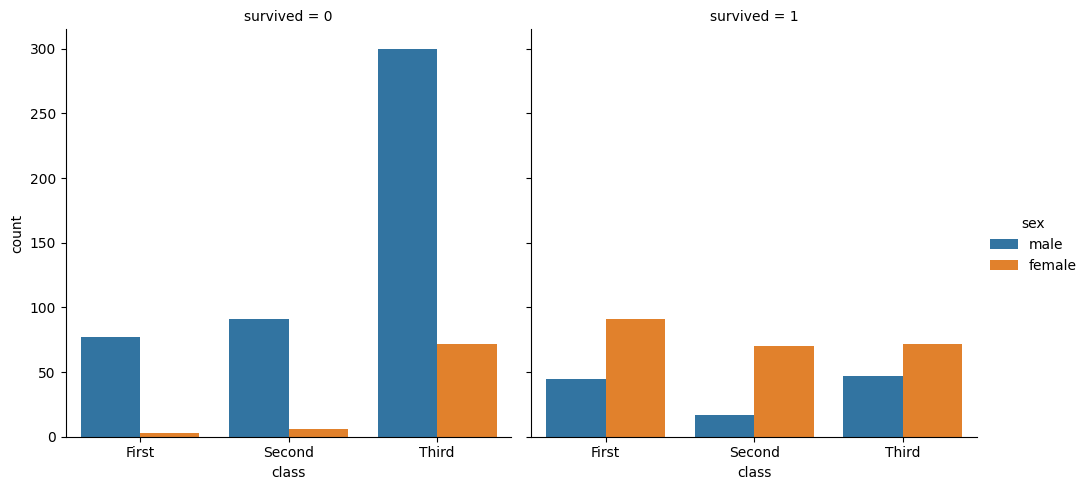

In [204]:
import matplotlib.pyplot as plt
sns.catplot(data=titanic, x='class', hue = 'sex', col='survived', kind = 'count')
plt.show()